In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import precision_recall_curve, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 

import warnings
warnings.filterwarnings("ignore")

## Loading the final preprocessed trained dataset


In [2]:
full_cleaned_final= pd.read_csv('full_cleaned_final.csv').drop(columns=['Unnamed: 0'])
full_cleaned_final.shape

(3938, 12)

In [3]:
#loading the train set

full_cleaned_final_train= pd.read_csv('full_cleaned_final_train.csv').drop(columns=['Unnamed: 0'])
full_cleaned_final_train.shape

(2756, 12)

## Loading the test set

In [4]:
#Loading the test set
full_cleaned_final_test = pd.read_csv('full_cleaned_final_test.csv').drop(columns=['Unnamed: 0'])
full_cleaned_final_test.shape

(1182, 12)

In [5]:
len(full_cleaned_final_test.columns)

12

## Feature Engineering

In [6]:
full_cleaned_final_train.columns

Index(['scale__coal_elec_per_capita', 'scale__oil_elec_per_capita',
       'scale__gas_elec_per_capita', 'scale__hydro_elec_per_capita',
       'scale__nuclear_elec_per_capita', 'scale__biofuel_elec_per_capita',
       'scale__other_renewables_elec_per_capita_exc_biofuel',
       'scale__solar_elec_per_capita', 'scale__wind_elec_per_capita',
       'remainder__country', 'remainder__year', 'remainder__GDP_per_capita'],
      dtype='object')

In [7]:
full_cleaned_final_train

,scale__coal_elec_per_capita,scale__oil_elec_per_capita,scale__gas_elec_per_capita,scale__hydro_elec_per_capita,scale__nuclear_elec_per_capita,scale__biofuel_elec_per_capita,scale__other_renewables_elec_per_capita_exc_biofuel,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__GDP_per_capita
0,0.000000,0.788117,0.011700,0.000358,0.000000,0.009123,0.000000,0.000000,0.023950,Estonia,2007,17459.098314
1,0.304435,0.003186,0.006744,0.040087,0.323919,0.020550,0.000000,0.000000,0.000000,Slovenia,2002,17301.933807
2,0.000000,0.000000,0.000000,0.000363,0.000000,0.000000,0.000000,0.000000,0.000000,Burundi,2007,298.936667
3,0.139283,0.014158,0.056164,0.036551,0.000000,0.121120,0.000966,0.077835,0.430534,Portugal,2016,19700.910002
4,0.000000,0.337144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Antigua and Barbuda,2010,14367.951496
...,...,...,...,...,...,...,...,...,...,...,...,...
2751,0.000000,0.005416,0.021343,0.003705,0.000000,0.004890,0.000000,0.000000,0.000000,Congo,2021,1515.893867
2752,0.000000,0.014000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Solomon Islands,2008,1884.483388
2753,0.103272,0.015529,0.054164,0.000404,0.126442,0.006446,0.000000,0.000000,0.000000,Hungary,2003,10255.610113
2754,0.000551,0.000000,0.005319,0.000845,0.000000,0.000049,0.000000,0.000000,0.000000,Nigeria,2011,2455.746990


## Best features


In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [25]:
full_cleaned_final.shape

(3938, 12)

In [9]:
X = full_cleaned_final[['scale__coal_elec_per_capita', 
                        'scale__oil_elec_per_capita',
                        'scale__gas_elec_per_capita', 
                        'scale__hydro_elec_per_capita',
                        'scale__nuclear_elec_per_capita', 
                        'scale__biofuel_elec_per_capita',
                        'scale__solar_elec_per_capita', 
                        'scale__wind_elec_per_capita',
                       ]]


y = full_cleaned_final['remainder__GDP_per_capita']


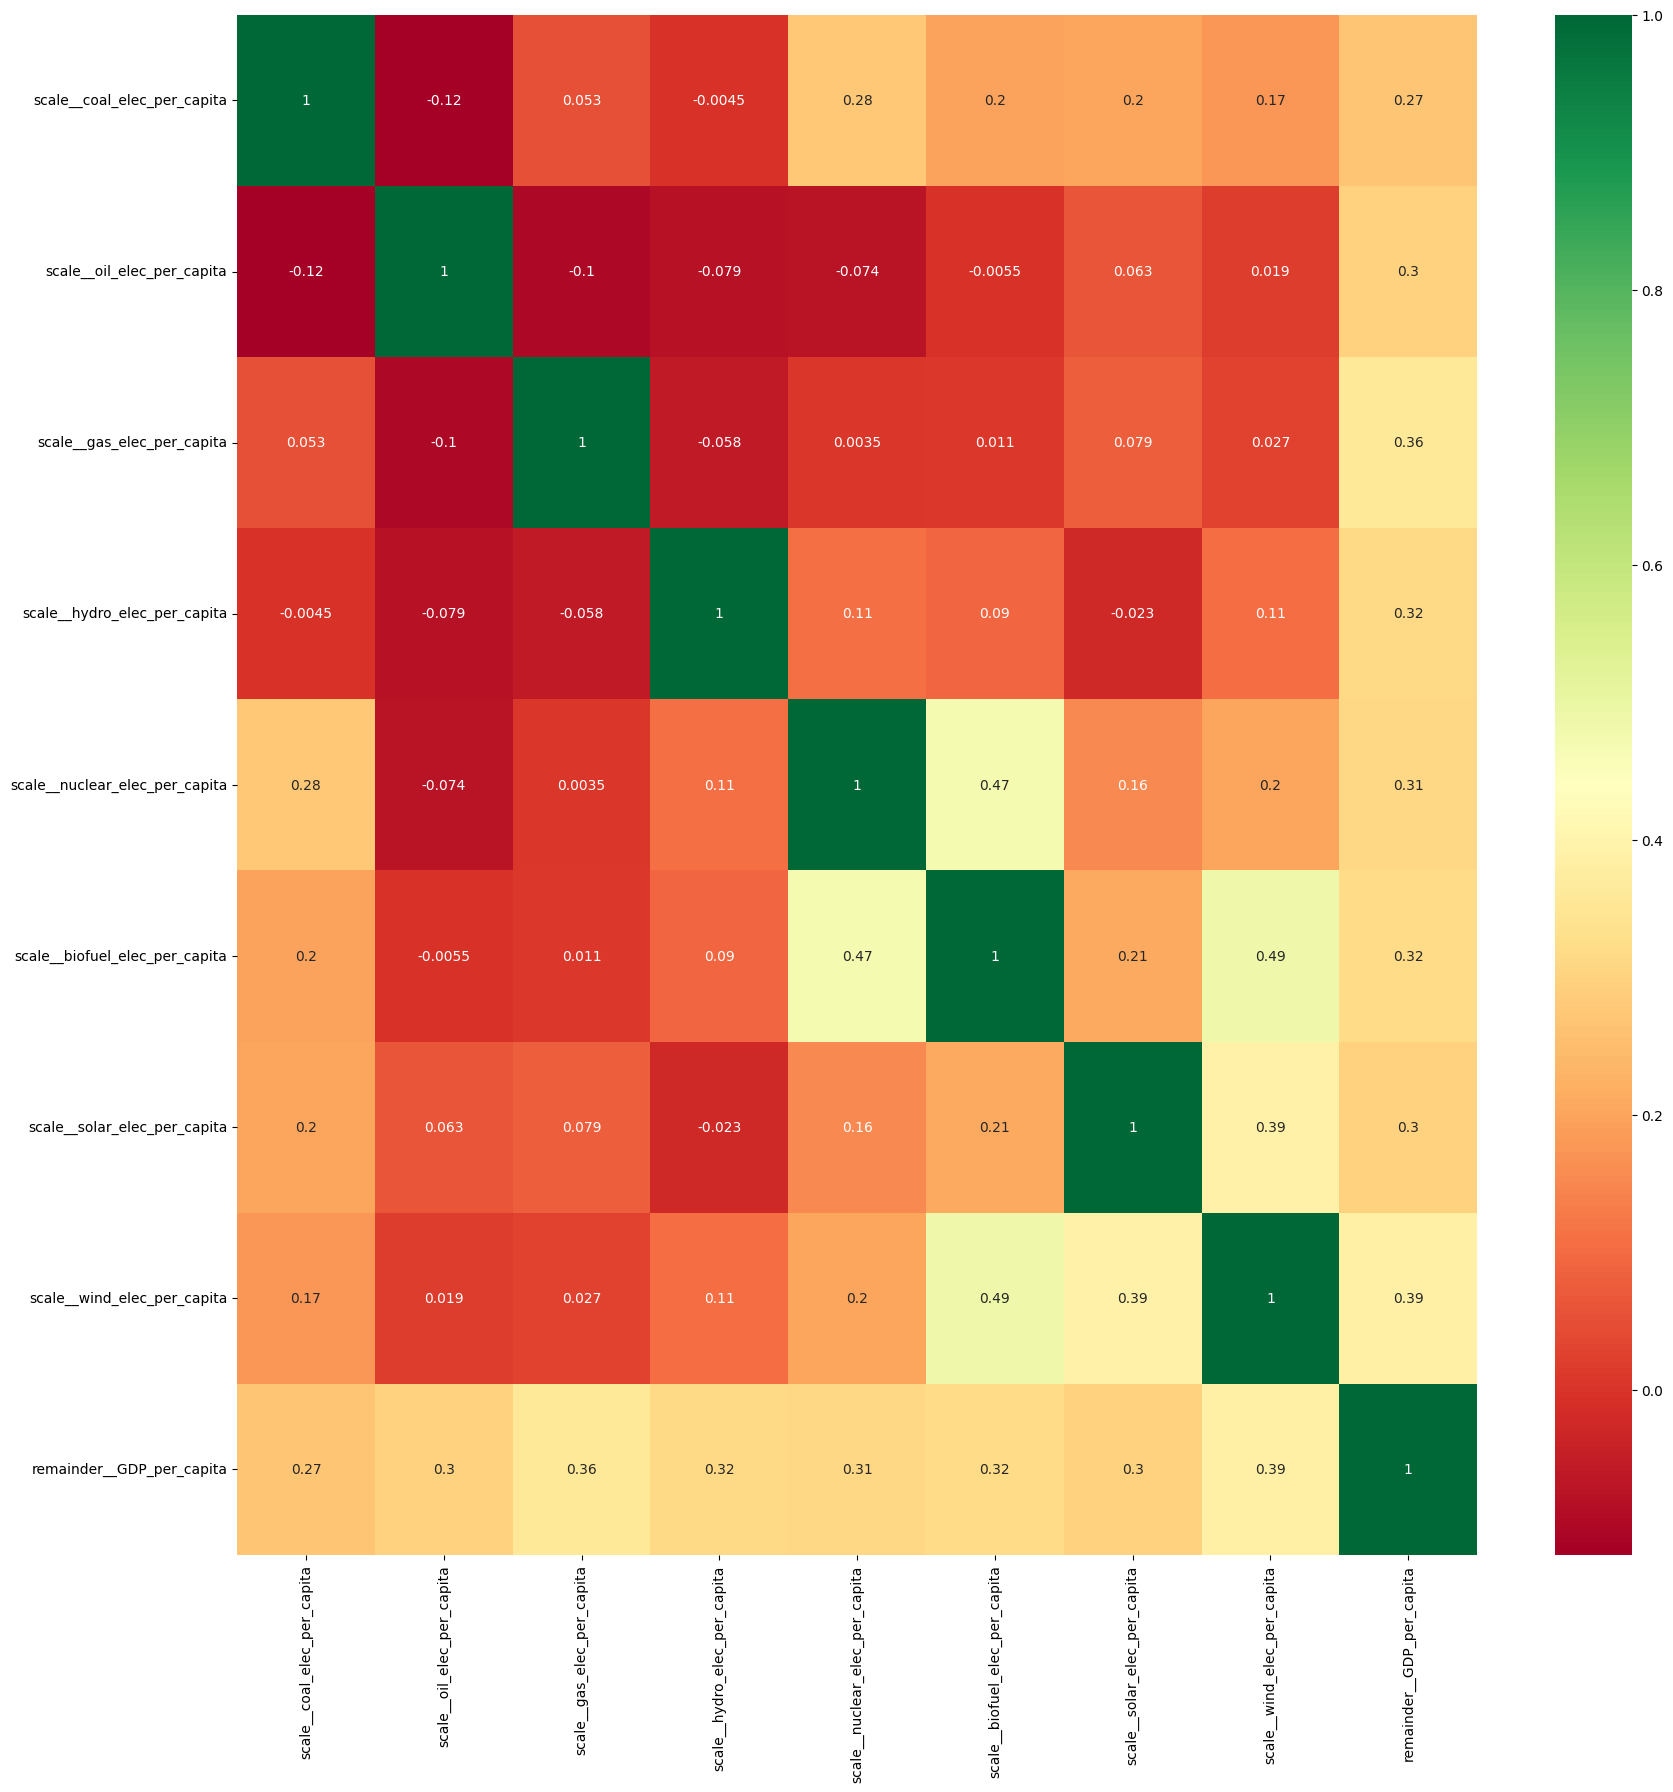

In [10]:
corrmat = full_cleaned_final[['scale__coal_elec_per_capita', 
                        'scale__oil_elec_per_capita',
                        'scale__gas_elec_per_capita', 
                        'scale__hydro_elec_per_capita',
                        'scale__nuclear_elec_per_capita', 
                        'scale__biofuel_elec_per_capita',
                        'scale__solar_elec_per_capita', 
                        'scale__wind_elec_per_capita',
                        'remainder__GDP_per_capita']].corr()

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(full_cleaned_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
#full_cleaned_final['scale__all_renewable'] = np.array(full_cleaned_final['scale__biofuel_electricity'])-np.array(full_cleaned_final['scale__wind_electricity'])+2*np.array(full_cleaned_final['scale__gas_production'])

#full_cleaned_final_test['scale__all_renewable'] = np.array(full_cleaned_final_test['scale__biofuel_electricity'])-np.array(full_cleaned_final_test['scale__wind_electricity'])+2*np.array(full_cleaned_final_test['scale__gas_production'])

In [12]:
full_cleaned_final.columns

Index(['scale__coal_elec_per_capita', 'scale__oil_elec_per_capita',
       'scale__gas_elec_per_capita', 'scale__hydro_elec_per_capita',
       'scale__nuclear_elec_per_capita', 'scale__biofuel_elec_per_capita',
       'scale__other_renewables_elec_per_capita_exc_biofuel',
       'scale__solar_elec_per_capita', 'scale__wind_elec_per_capita',
       'remainder__country', 'remainder__year', 'remainder__GDP_per_capita'],
      dtype='object')

In [13]:
full_cleaned_final1 = full_cleaned_final.drop(columns=['remainder__year','remainder__country'])

In [14]:
full_cleaned_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3938 entries, 0 to 3937
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   scale__coal_elec_per_capita                          3938 non-null   float64
 1   scale__oil_elec_per_capita                           3938 non-null   float64
 2   scale__gas_elec_per_capita                           3938 non-null   float64
 3   scale__hydro_elec_per_capita                         3938 non-null   float64
 4   scale__nuclear_elec_per_capita                       3938 non-null   float64
 5   scale__biofuel_elec_per_capita                       3938 non-null   float64
 6   scale__other_renewables_elec_per_capita_exc_biofuel  3938 non-null   float64
 7   scale__solar_elec_per_capita                         3938 non-null   float64
 8   scale__wind_elec_per_capita                          3938 non-null  

In [15]:
full_cleaned_final1['remainder__GDP_per_capita'].head(3)

0    368.187174
1    378.391401
2    359.766343
Name: remainder__GDP_per_capita, dtype: float64

### Train on OLS model

In [16]:
X_train = full_cleaned_final_train[['scale__coal_elec_per_capita', 
                                    'scale__oil_elec_per_capita',
                                    'scale__gas_elec_per_capita', 
                                    'scale__hydro_elec_per_capita',
                                    'scale__nuclear_elec_per_capita', 
                                    'scale__biofuel_elec_per_capita',
                                    'scale__solar_elec_per_capita', 
                                    'scale__wind_elec_per_capita',
                                   ]]

X_test = full_cleaned_final_test[['scale__coal_elec_per_capita', 
                                  'scale__oil_elec_per_capita',
                                  'scale__gas_elec_per_capita', 
                                  'scale__hydro_elec_per_capita',
                                  'scale__nuclear_elec_per_capita', 
                                  'scale__biofuel_elec_per_capita',
                                  'scale__solar_elec_per_capita', 
                                  'scale__wind_elec_per_capita',
                                   ]]


y_train = full_cleaned_final_train['remainder__GDP_per_capita']
y_test = full_cleaned_final_test['remainder__GDP_per_capita']

# Trying Ridge

In [35]:
for a in range(1,5):
    for b in range(100,15000, 500):

Poly_model = PolynomialFeatures(degree=3)
ridge_model = Ridge(alpha=0.1, alpha=1.0, *, 
                    fit_intercept=True, 
                    copy_X=True, 
                    max_iter=None, 
                    tol=0.0001, 
                    solver='auto', 
                    positive=False, 
                    random_state=None)  # alpha controls the strength of the regularization

# Create a pipeline to combine the polynomial features and the Ridge model
pipeline = make_pipeline(Poly_model, ridge_model)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


# Evaluate the pipeline on the test data
score = pipeline.score(X_test, y_test)
print(score, 'test_score')

y_pred = pipeline.predict(X_train)

r2_score_train=r2_score(y_train,y_pred)
print(r2_score_train, 'train score')

0.7171450657755343 test_score
0.697851808441909 train score


In [19]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the pipeline
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.71772753 0.71858094 0.67101239 0.60435859 0.68704646]
Mean cross-validation score: 0.6797451807637523
Standard deviation of cross-validation scores: 0.04186546156908656


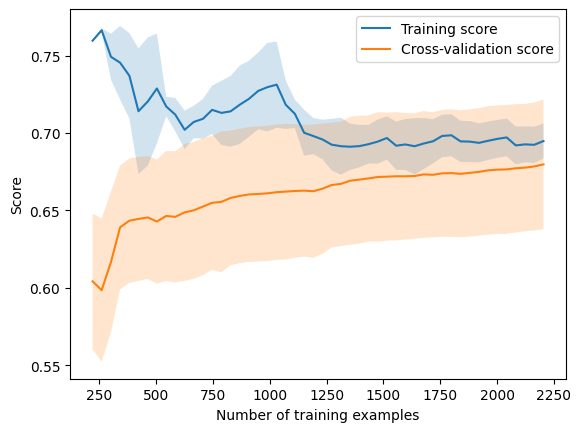

In [20]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 50)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, train_sizes=train_sizes, cv=5)

# Compute the mean and standard deviation of the training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Number of training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# Decision Tree

In [32]:
np.sqrt(X_train.shape[0])

52.49761899362675

In [24]:
# Create a decision tree regressor
print('Initiating models...')
for a in range(2,10):
    for b in range(2,15):
        for c in range(2,15):
            
            tree = DecisionTreeRegressor(max_depth=a, 
                                         criterion='absolute_error',
                                         random_state=0,
                                         min_samples_split=b, 
                                         min_samples_leaf=c, 
                                         min_weight_fraction_leaf=0.0, 
                                         max_features=None,
                                         max_leaf_nodes=None, 
                                         min_impurity_decrease=0, 
                                         ccp_alpha=0.1)
            
            # Fit the model to the training data
            tree.fit(X_train, y_train)
            
            
            # Evaluate the model on the training data
            y_train_pred = tree.predict(X_train)
            r2_train = r2_score(y_train, y_train_pred)
            
            # Evaluate the model on the test data
            y_test_pred = tree.predict(X_test)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Compute the mean absolute error
            mae = mean_absolute_error(y_test, y_test_pred)
            
            # Compute the mean squared error
            mse = mean_squared_error(y_test, y_test_pred)
            
            if r2_train - r2_test < 0.042:
                print(a, b, c)
                print('-'*10)
                print(r2_train - r2_test)
                print('-'*10)
                print("Training set R^2 score:", r2_train)
                print("Test set R^2 score:", r2_test)
                if r2_train - r2_test < 0.04:
                    print('found the model  '*6)
                    
                print("Test set mean absolute error:", mae)
                if mae < 3300:
                    print('   *'*30)
                print("Test set mean squared error:", mse)
                print("-"*50)
print('finished')

Initiating models...
6 2 4
----------
0.03501270836152348
----------
Training set R^2 score: 0.7907310982912243
Test set R^2 score: 0.7557183899297009
found the model  found the model  found the model  found the model  found the model  found the model  
Test set mean absolute error: 4466.9863180669945
Test set mean squared error: 94424772.06266911
--------------------------------------------------
6 2 5
----------
0.03881691205346938
----------
Training set R^2 score: 0.7863978462044765
Test set R^2 score: 0.7475809341510071
found the model  found the model  found the model  found the model  found the model  found the model  
Test set mean absolute error: 4572.521545093847
Test set mean squared error: 97570229.49948591
--------------------------------------------------
6 2 6
----------
0.03624165998649975
----------
Training set R^2 score: 0.7864063964364248
Test set R^2 score: 0.7501647364499251
found the model  found the model  found the model  found the model  found the model  found

KeyboardInterrupt: 

# Random Forest

Converting y to an array

In [24]:
y_train = np.array(y_train).reshape(2864,)
y_train.shape

(2864,)

The model below has been tuned from a Decision Tree model above. Subsequently the random forest improve the model's score.

In [73]:
rf = RandomForestRegressor(n_estimators=110, 
                            criterion='squared_error', 
                            max_depth=3, 
                            min_samples_split=2, 
                            min_samples_leaf=3, 
                            max_features=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0, 
                            bootstrap=True, 
                            oob_score=True, 
                            n_jobs=-1, 
                            random_state=0, 
                            verbose=0, 
                            warm_start=False, 
                            ccp_alpha=0, 
                            max_samples=None)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Evaluate the model on the training data
y_train_pred = rf.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the test data
y_test_pred = rf.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

# Compute the mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_test_pred)

# Print the results
if r2_train - r2_test < 0.02: 
    print(a)
    print("Training set R^2 score:", r2_train)
    print("Test set R^2 score:", r2_test)
    print("Difference R^2 TESTvsTRAIN", r2_test-r2_train)
    if r2_train-r2_test < 0.04:
        print('found the model  '*6)
        
    print("Test set mean absolute error:", mae)
    print("Test set mean squared error:", mse)
    print("-"*50)

/tmp/ipykernel_14334/3214213621.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


170
Training set R^2 score: 0.6657798427013696
Test set R^2 score: 0.6540384666562732
Difference R^2 TESTvsTRAIN -0.011741376045096397
found the model  found the model  found the model  found the model  found the model  found the model  
Test set mean absolute error: 6320.579140464287
Test set mean squared error: 139161814.45252684
--------------------------------------------------


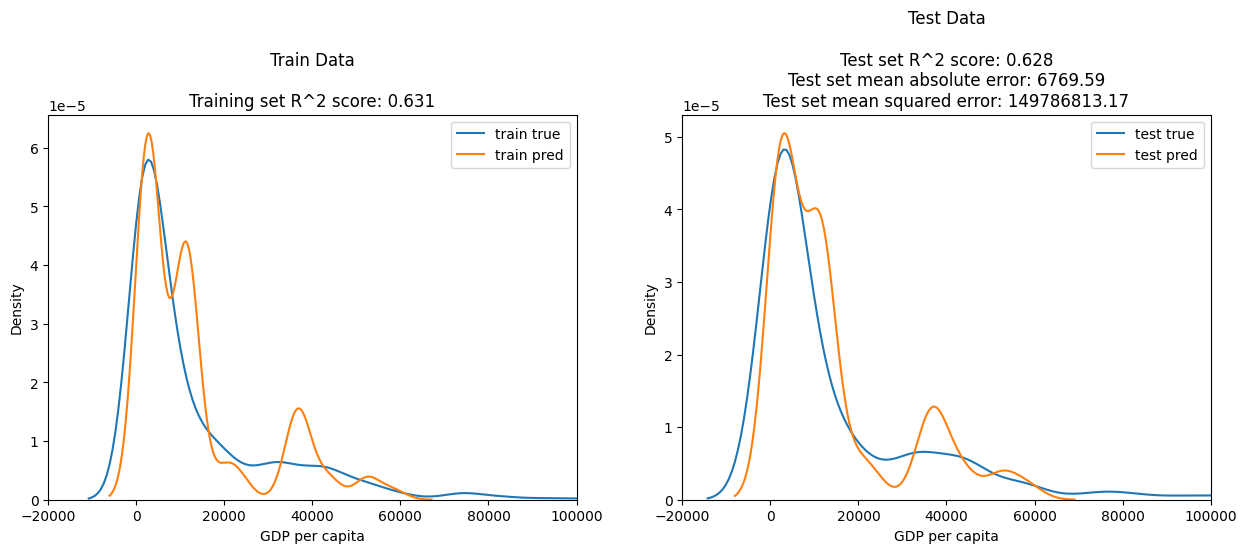

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# plot train data
sns.kdeplot(y_train, label='train true', ax=ax1)
sns.kdeplot(y_train_pred, label='train pred', ax=ax1)
ax1.set_xlim(-20000, 100000)
ax1.legend()
ax1.set_xlabel('GDP per capita')
ax1.set_ylabel('Density')
ax1.set_title(f'Train Data\n\nTraining set R^2 score: {r2_score(y_train, y_train_pred):.3f}')

# plot test data
sns.kdeplot(y_test['remainder__GDP_per_capita'], label='test true', ax=ax2)
sns.kdeplot(y_test_pred, label='test pred', ax=ax2)
ax2.set_xlim(-20000, 100000)
ax2.legend()
ax2.set_xlabel('GDP per capita')
ax2.set_ylabel('Density')
ax2.set_title(f'Test Data\n\nTest set R^2 score: {r2_score(y_test, y_test_pred):.3f}\nTest set mean absolute error: {mean_absolute_error(y_test, y_test_pred):.2f}\nTest set mean squared error: {mean_squared_error(y_test, y_test_pred):.2f}')


plt.show()

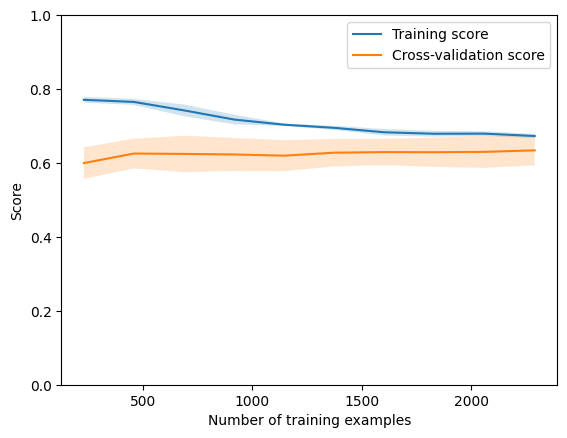

In [78]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, train_sizes=train_sizes, cv=5)

# Compute the mean and standard deviation of the training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Number of training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.ylim(0, 1)
plt.show()